In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
import random
import numpy as np
from asyncio import exceptions

In [3]:
def pickle_load(dir, filename):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'rb')

  # dump information to that file
  data = pickle.load(file)

  # close the file
  file.close()
  return data

In [4]:
dir = '/content/drive/MyDrive/Colab Notebooks/Pickle'
train_data_x = pickle_load(dir, "train_data_x.pk")
train_data_y = pickle_load(dir, "train_data_y.pk")

test_data_x = pickle_load(dir, "test_data_x.pk")
test_data_y = pickle_load(dir, "test_data_y.pk")

In [5]:
print(train_data_x.shape, train_data_y.shape)
print(test_data_x.shape, test_data_y.shape)

(5000, 100, 100, 3) (5000,)
(1000, 100, 100, 3) (1000,)


In [6]:
img_size = 100
categories = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

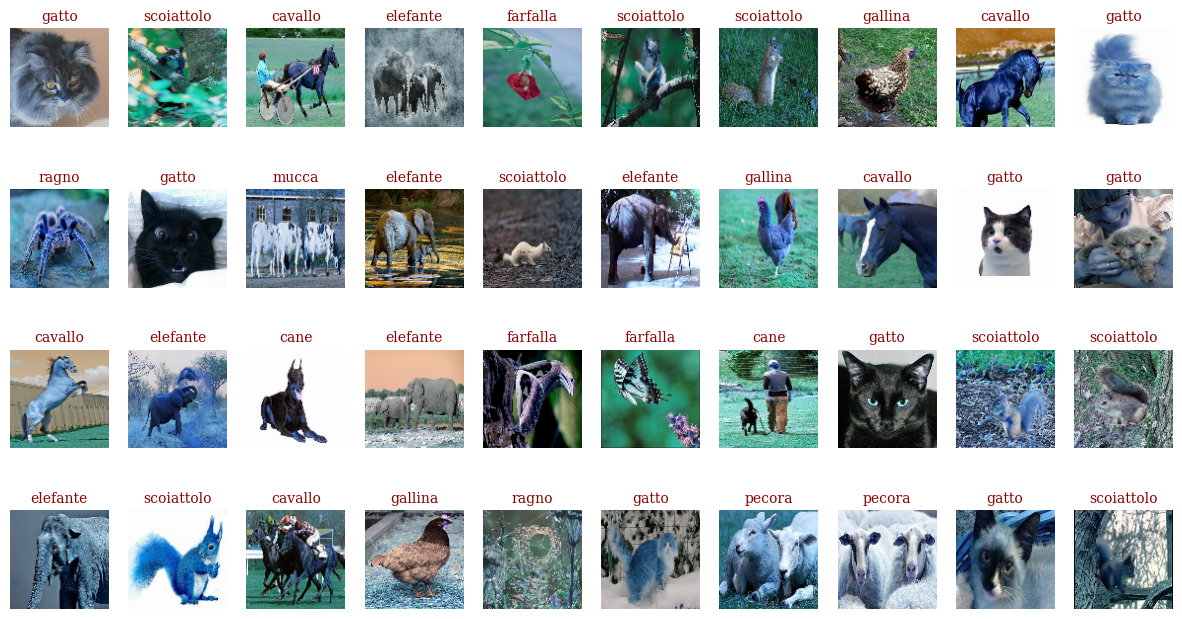

In [7]:
plt.figure(figsize=(15,8))
for i, img in enumerate(train_data_x) :
    plt.subplot(4,10, i+1)
    img = np.reshape(img, (img_size,img_size,3))
    plt.imshow(img)
    plt.axis('off')
    fontdict={'family': 'serif','color':  'darkred','weight': 'normal', 'size': 10,}
    category = categories[train_data_y[i]]
    plt.title(category, fontdict=fontdict)
    if (i+1) == 40:
        break
plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10

In [9]:
model = keras.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 98, 98, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                        

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
train_data_x, test_data_x = train_data_x/255.0, test_data_x/255.0

In [15]:
hist = model.fit(x=train_data_x, y=train_data_y, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
32/32 [==============================] - 9s 279ms/step - loss: 1.9452 - accuracy: 0.3613 - val_loss: 5.4731 - val_accuracy: 0.1000
Epoch 2/30
32/32 [==============================] - 7s 218ms/step - loss: 1.5999 - accuracy: 0.4715 - val_loss: 3.3606 - val_accuracy: 0.0980
Epoch 3/30
32/32 [==============================] - 7s 209ms/step - loss: 1.4484 - accuracy: 0.5092 - val_loss: 7.3296 - val_accuracy: 0.1000
Epoch 4/30
32/32 [==============================] - 7s 210ms/step - loss: 1.2650 - accuracy: 0.5717 - val_loss: 3.2777 - val_accuracy: 0.0930
Epoch 5/30
32/32 [==============================] - 7s 209ms/step - loss: 1.1155 - accuracy: 0.6122 - val_loss: 3.2521 - val_accuracy: 0.0830
Epoch 6/30
32/32 [==============================] - 7s 208ms/step - loss: 0.9592 - accuracy: 0.6740 - val_loss: 3.8985 - val_accuracy: 0.0960
Epoch 7/30
32/32 [==============================] - 7s 211ms/step - loss: 0.8493 - accuracy: 0.7072 - val_loss: 5.2166 - val_accuracy: 0.0980
Epoch 

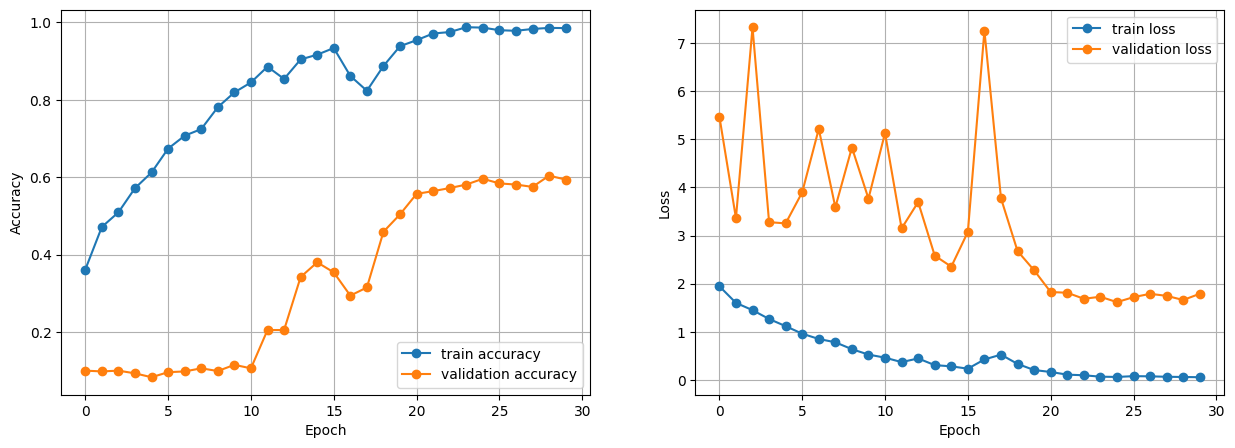

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], 'o-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'o-', label='train loss')
plt.plot(hist.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

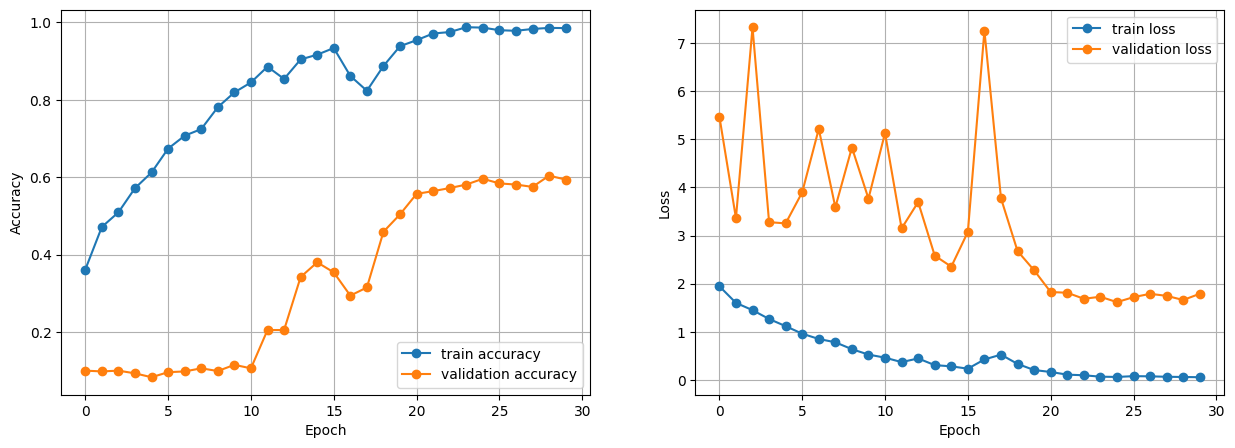

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], 'o-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'o-', label='train loss')
plt.plot(hist.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
results = model.evaluate(test_data_x, test_data_y, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 46ms/step - loss: 1.8262 - accuracy: 0.5860
test loss, test acc: [1.826248288154602, 0.5860000252723694]


In [19]:
predictions = model.predict(test_data_x)

32/32 [==============================] - 1s 18ms/step


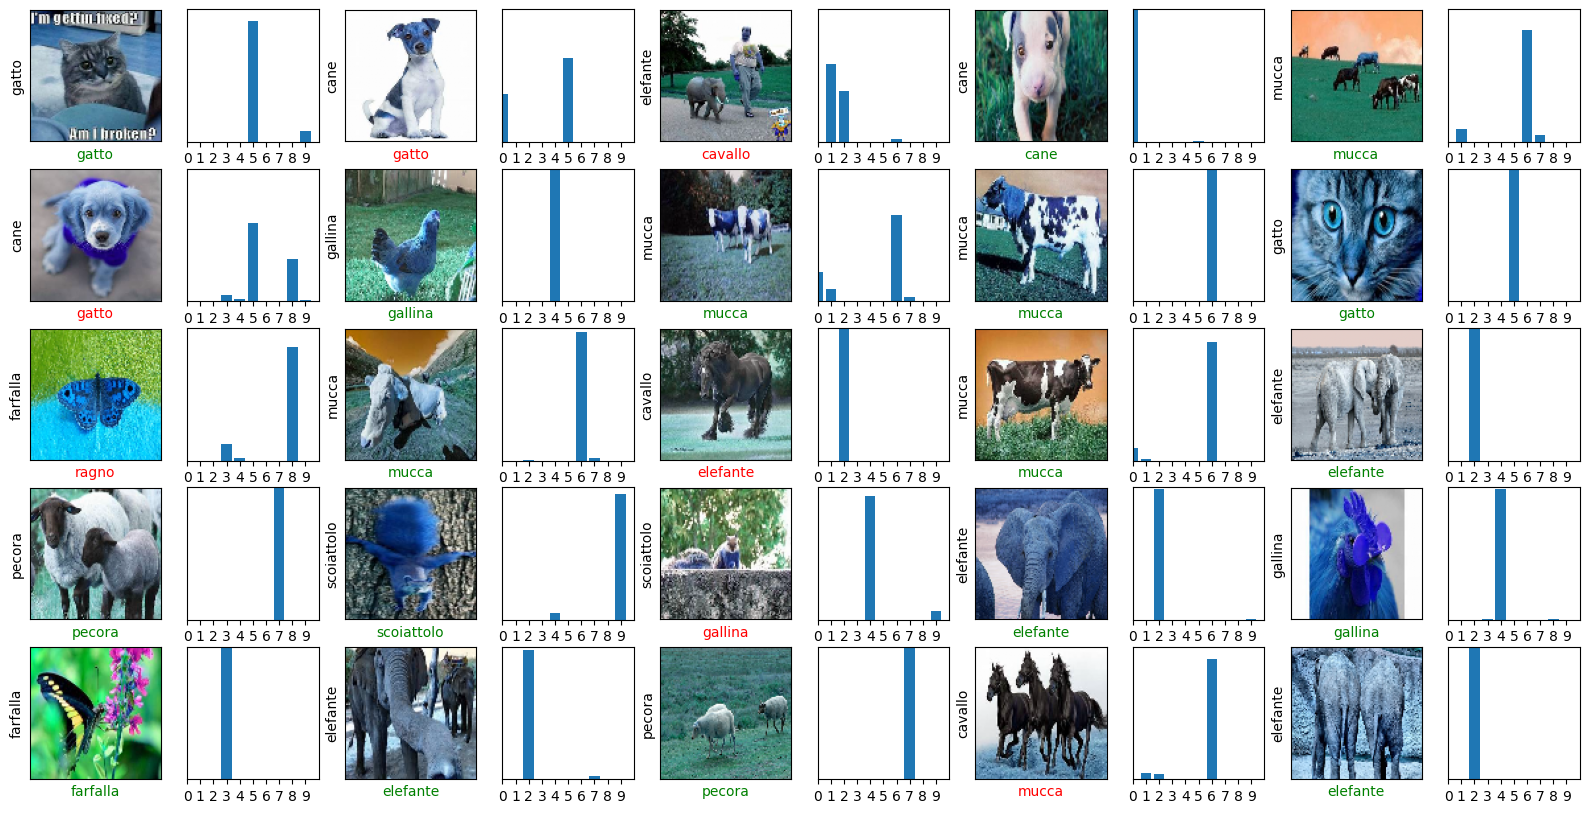

In [20]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(test_data_x[i])
    plt.xticks([])
    plt.yticks([])
    # plt.ylabel(categories[np.argmax(test_data_y[i])])
    plt.ylabel(categories[test_data_y[i]])
    c = np.argmax(predictions[i])
    # if testing_data_y[i][0] == np.argmax(predictions[i]):
    if test_data_y[i] == c:
        plt.xlabel(categories[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(categories[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()